In [2]:
!pip install wfdb scipy

#Cargar datos

In [49]:
from google.colab import files

uploaded = files.upload()


Saving A00117.hea to A00117 (2).hea
Saving A00117.mat to A00117 (2).mat
Saving A00647.hea to A00647 (2).hea
Saving A00647.mat to A00647 (2).mat
Saving A00883.hea to A00883 (2).hea
Saving A00883.mat to A00883 (2).mat
Saving A01080.hea to A01080 (2).hea
Saving A01080.mat to A01080 (2).mat
Saving A01157.hea to A01157 (2).hea
Saving A01157.mat to A01157 (2).mat
Saving A01562.hea to A01562 (2).hea
Saving A01562.mat to A01562 (2).mat
Saving A02375.hea to A02375 (2).hea
Saving A02375.mat to A02375 (2).mat
Saving A02405.hea to A02405 (2).hea
Saving A02405.mat to A02405 (2).mat
Saving A02429.hea to A02429 (2).hea
Saving A02429.mat to A02429 (2).mat
Saving A02499.hea to A02499 (2).hea
Saving A02499.mat to A02499 (2).mat
Saving A02900.hea to A02900 (2).hea
Saving A02900.mat to A02900 (2).mat
Saving A02928.hea to A02928 (2).hea
Saving A02928.mat to A02928 (2).mat
Saving A03358.hea to A03358 (2).hea
Saving A03358.mat to A03358 (2).mat
Saving A03445.hea to A03445 (2).hea
Saving A03445.mat to A03445 

In [52]:
import pandas as pd
import wfdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Cargar el archivo CSV con las features RR
df = pd.read_csv("ecg_rr_features_curado (4).csv")

# Quitar espacios en blanco por si acaso
df['label'] = df['label'].str.strip()

# Filtrar solo las clases que nos interesan: Normal y AFib
df_filtrado = df[df['label'].isin(['Normal', 'AFib'])]

# Mostrar conteo por clase
conteo = df_filtrado['label'].value_counts()
print("Distribución de clases:\n", conteo)

# Determinar el mínimo (por si alguna clase tiene menos de 15)
minimo = min(15, int(conteo.min()))

# Tomar muestras
muestra_normal = df_filtrado[df_filtrado['label'] == 'Normal'].sample(n=minimo, random_state=42)
muestra_afib = df_filtrado[df_filtrado['label'] == 'AFib'].sample(n=minimo, random_state=42)

# Combinar y mezclar
muestra_balanceada = pd.concat([muestra_normal, muestra_afib]).sample(frac=1, random_state=42).reset_index(drop=True)

# Guardar a CSV
muestra_balanceada.to_csv("ecg_muestra_balanceada.csv", index=False)

print("✅ Muestra balanceada creada con éxito: ecg_muestra_balanceada.csv")
print(muestra_balanceada['label'].value_counts())


Distribución de clases:
 label
Normal    5050
AFib       738
Name: count, dtype: int64
✅ Muestra balanceada creada con éxito: ecg_muestra_balanceada.csv
label
AFib      15
Normal    15
Name: count, dtype: int64


In [40]:
# Parámetro de frecuencia
fs = 300  # Hz

# === 1. Cargar etiquetas desde la muestra balanceada ===
df_ref = pd.read_csv('ecg_muestra_balanceada.csv')

# Renombrar columna si es necesario (asegurar que sea "id" y "label")
df_ref.columns = ['id', 'f1', 'f2', 'f3', 'f4', 'label']

# Filtrar clases válidas: solo "Normal" y "AFib"
df_ref = df_ref[df_ref['label'].isin(['Normal', 'AFib'])].reset_index(drop=True)

# Verificar contenido
print("✅ Datos cargados correctamente.\n")
print(df_ref.head())

✅ Datos cargados correctamente.

       id          f1          f2        f3        f4   label
0  A06397  255.014493  170.008453  1.074831  0.464671    AFib
1  A02900  134.474886   86.716212  0.913595  0.233076    AFib
2  A05366  187.637131  141.009672  1.254278  1.070898    AFib
3  A02375  134.639640  104.591513  1.631326  2.394856    AFib
4  A04689  419.142857  300.451874  0.817003 -0.548612  Normal


In [41]:
print("\n--- Inspección básica ---")
print("\n.describe():")
print(df_ref.describe(include='all'))

print("\nTipos de datos:")
print(df_ref.dtypes)


--- Inspección básica ---

.describe():
            id          f1          f2         f3         f4 label
count       30   30.000000   30.000000  30.000000  30.000000    30
unique      30         NaN         NaN        NaN        NaN     2
top     A06397         NaN         NaN        NaN        NaN  AFib
freq         1         NaN         NaN        NaN        NaN    15
mean       NaN  270.480976  202.876821   1.291450   1.706252   NaN
std        NaN  111.544120   80.550386   0.470672   2.425821   NaN
min        NaN   92.606438   69.627585   0.385011  -0.650506   NaN
25%        NaN  183.092083  134.198157   0.977612   0.083865   NaN
50%        NaN  257.302568  200.872496   1.264351   1.142452   NaN
75%        NaN  366.578805  276.662529   1.585498   2.403940   NaN
max        NaN  546.481481  334.172431   2.527234   9.606738   NaN

Tipos de datos:
id        object
f1       float64
f2       float64
f3       float64
f4       float64
label     object
dtype: object


<ipython-input-42-4059101364>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_ref, x='label', palette='pastel')


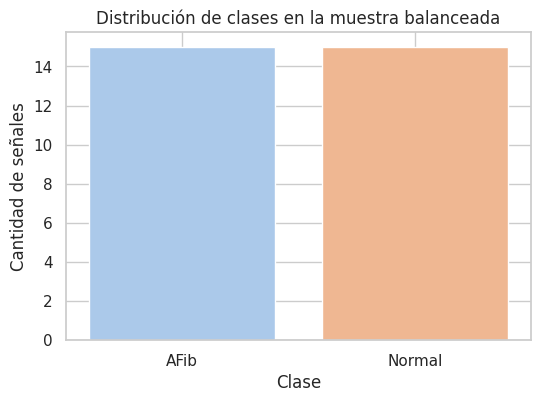

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_ref, x='label', palette='pastel')
plt.title('Distribución de clases en la muestra balanceada')
plt.xlabel('Clase')
plt.ylabel('Cantidad de señales')
plt.grid(True)
plt.show()


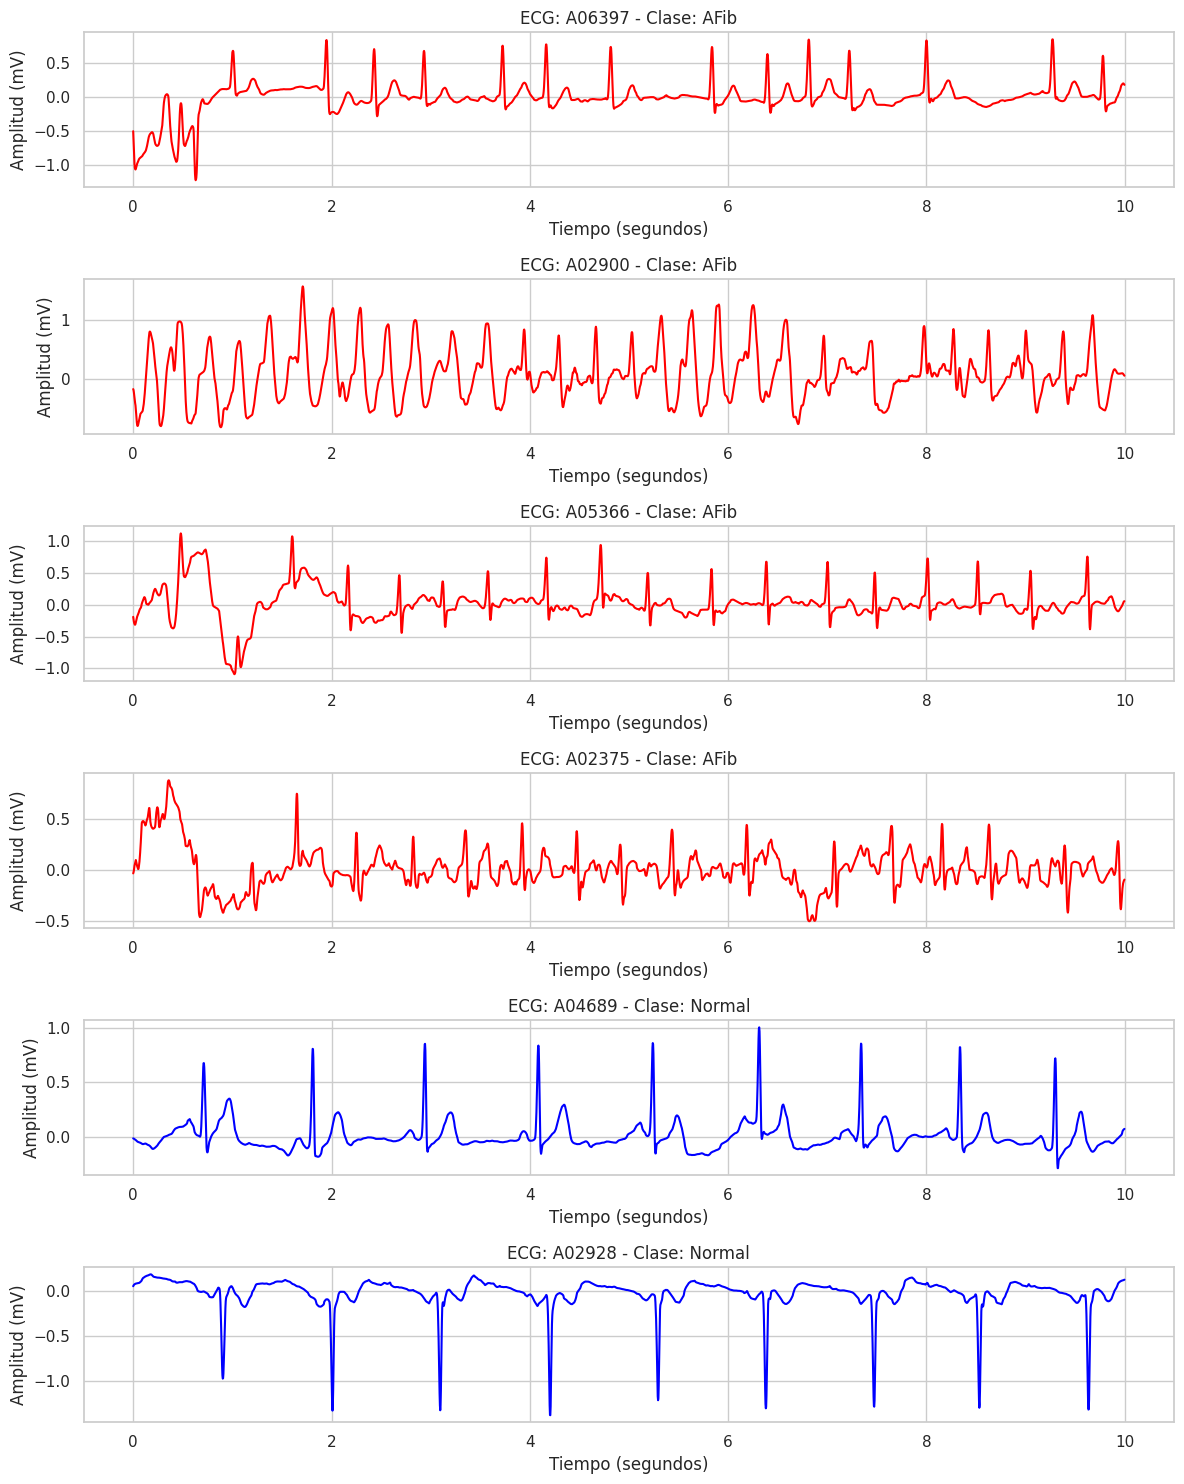

In [43]:
def mostrar_varias_senales(df, num=6, fs=300):
    plt.figure(figsize=(12, num * 2.5))
    for i, row in df.head(num).iterrows():
        try:
            record = wfdb.rdrecord(row['id'])
            signal = record.p_signal[:fs * 10].flatten()  # primeros 10 segundos
            tiempo = np.arange(len(signal)) / fs  # eje X: tiempo en segundos

            plt.subplot(num, 1, i + 1)
            plt.plot(tiempo, signal, color='blue' if row['label'] == 'Normal' else 'red')
            plt.title(f"ECG: {row['id']} - Clase: {row['label']}")
            plt.xlabel("Tiempo (segundos)")
            plt.ylabel("Amplitud (mV)")
            plt.grid(True)
        except Exception as e:
            print(f"⚠️ No se pudo cargar {row['id']}: {e}")
            continue

    plt.tight_layout()
    plt.show()

# Mostrar señales
mostrar_varias_senales(df_ref, num=6, fs=fs)

Resumen del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       30 non-null     object 
 1   mean_rr  30 non-null     float64
 2   std_rr   30 non-null     float64
 3   skew_rr  30 non-null     float64
 4   kurt_rr  30 non-null     float64
 5   label    30 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.5+ KB
None

Primeras filas:
       id     mean_rr      std_rr   skew_rr   kurt_rr   label
0  A06397  613.546099  199.898797  1.168773  1.350203    AFib
1  A02900  383.244444  127.736967  1.619724  3.183308    AFib
2  A05366  531.851852   75.598209  0.668771  0.890665    AFib
3  A02375  577.687075  145.318797  1.677749  3.186396    AFib
4  A04689  999.642857   62.781678  1.335801  0.459524  Normal

Resumen estadístico:
           mean_rr      std_rr    skew_rr    kurt_rr
count    30.000000   30.000000  30.000000  30.00000

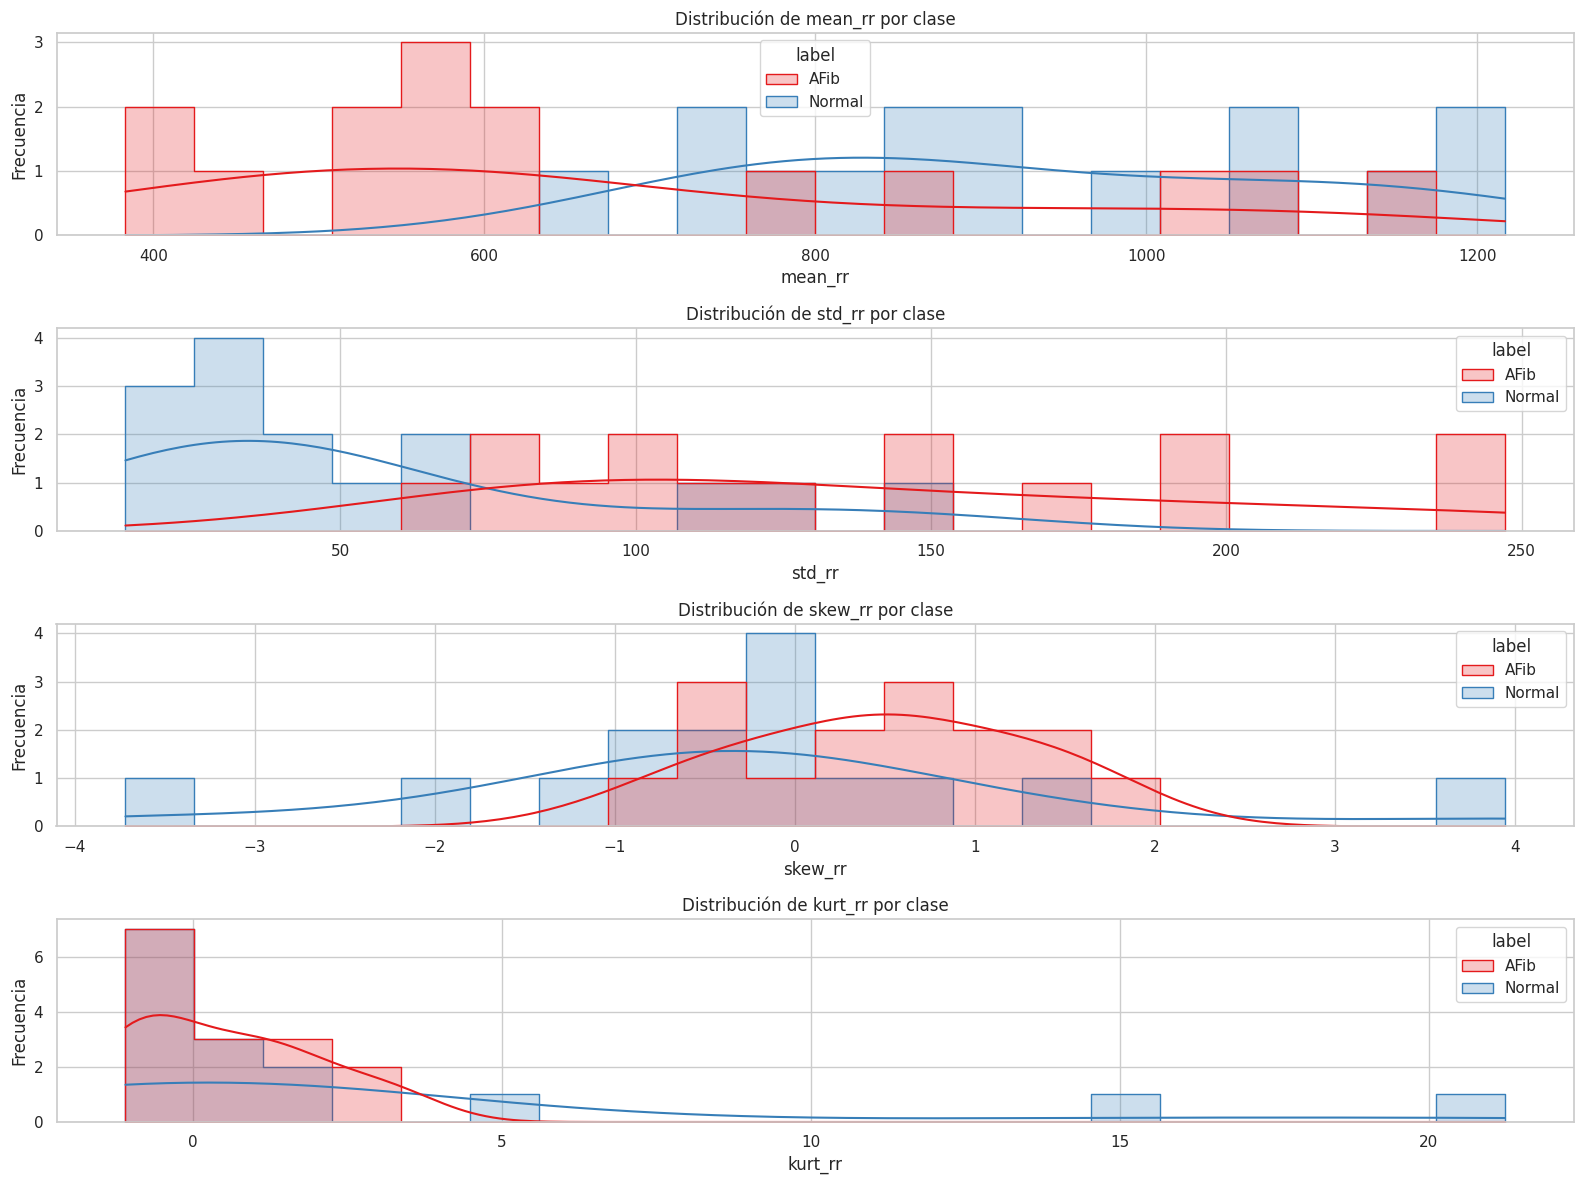

In [53]:
# Cargar la muestra balanceada
df = pd.read_csv("ecg_muestra_balanceada.csv")

# Mostrar una inspección rápida
print("Resumen del dataset:\n")
print(df.info())
print("\nPrimeras filas:")
print(df.head())
print("\nResumen estadístico:")
print(df.describe())

# Obtener solo las columnas numéricas (excluyendo la etiqueta)
features = df.select_dtypes(include='number').columns

# Configurar estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, len(features) * 3))

# Generar un histograma por cada feature
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.histplot(data=df, x=feature, hue="label", kde=True, element="step", palette='Set1', bins=20)
    plt.title(f'Distribución de {feature} por clase')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## Conclusiones

- Algunas variables como **rmssd** y **pnn50** muestran diferencias notables entre clases (por ejemplo, AFib tiende a tener valores mayores).
- La variable **mean_rr** también presenta una distribución distinta en pacientes con fibrilación auricular (ritmos más irregulares).
- Se observan **outliers** en algunas variables como `nn50`, lo cual podría reflejar la variabilidad extrema en ciertos casos.
- En general, el dataset está limpio, bien etiquetado, y permite ya desde esta etapa observar **tendencias diferenciadoras** entre ritmo normal y AFib, lo que será útil para entrenar clasificadores más adelante.
